# CA5
Ali Hosseini Akhavan - 810199406 & Amirhossein Yousefvand - 810199516 & Mohammadhossein Nikkhah Ghomi - 810199506

## TASK 1 : Preprocessing

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
dataset_path = "football.csv"
df = pd.read_csv(dataset_path)
df.shape

(8925, 12)

* Drop Duplicates:

In [54]:
df.drop_duplicates()
df.shape

(8925, 12)

In [55]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   object 
 1   playerId               8925 non-null   object 
 2   playType               8925 non-null   object 
 3   bodyPart               8925 non-null   object 
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8891 non-null   object 
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB
None


In [56]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 x            y  interveningOpponents  interveningTeammates  \
count  8925.000000  8925.000000           8925.000000           8925.000000   
mean     14.564631     0.364408              2.531989              0.336471   
std       7.841865     8.999063              1.386693              0.680175   
min       0.000000   -33.920000              0.000000              0.000000   
25%       8.480000    -5.740000              2.000000              0.000000   
50%      12.470000     0.500000              2.000000              0.000000   
75%      20.950000     6.730000              3.000000              0.000000   
max      70.820000    33.920000             11.000000              7.000000   

            minute       second  
count  8925.000000  8925.000000  
mean     48.541401    29.243810  
std      26.397998    17.306565  
min       0.000000     0.000000  
25%      26.000000    14.000000  
50%      49.000000    29.000000  
75%      71.000000    44.0000

In [57]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
matchId                   0
playerId                  0
playType                  0
bodyPart                  0
x                         0
y                         0
interveningOpponents      0
interveningTeammates      0
interferenceOnShooter    34
minute                    0
second                    0
outcome                  34
dtype: int64


In [58]:
df.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal


<Figure size 1200x800 with 0 Axes>

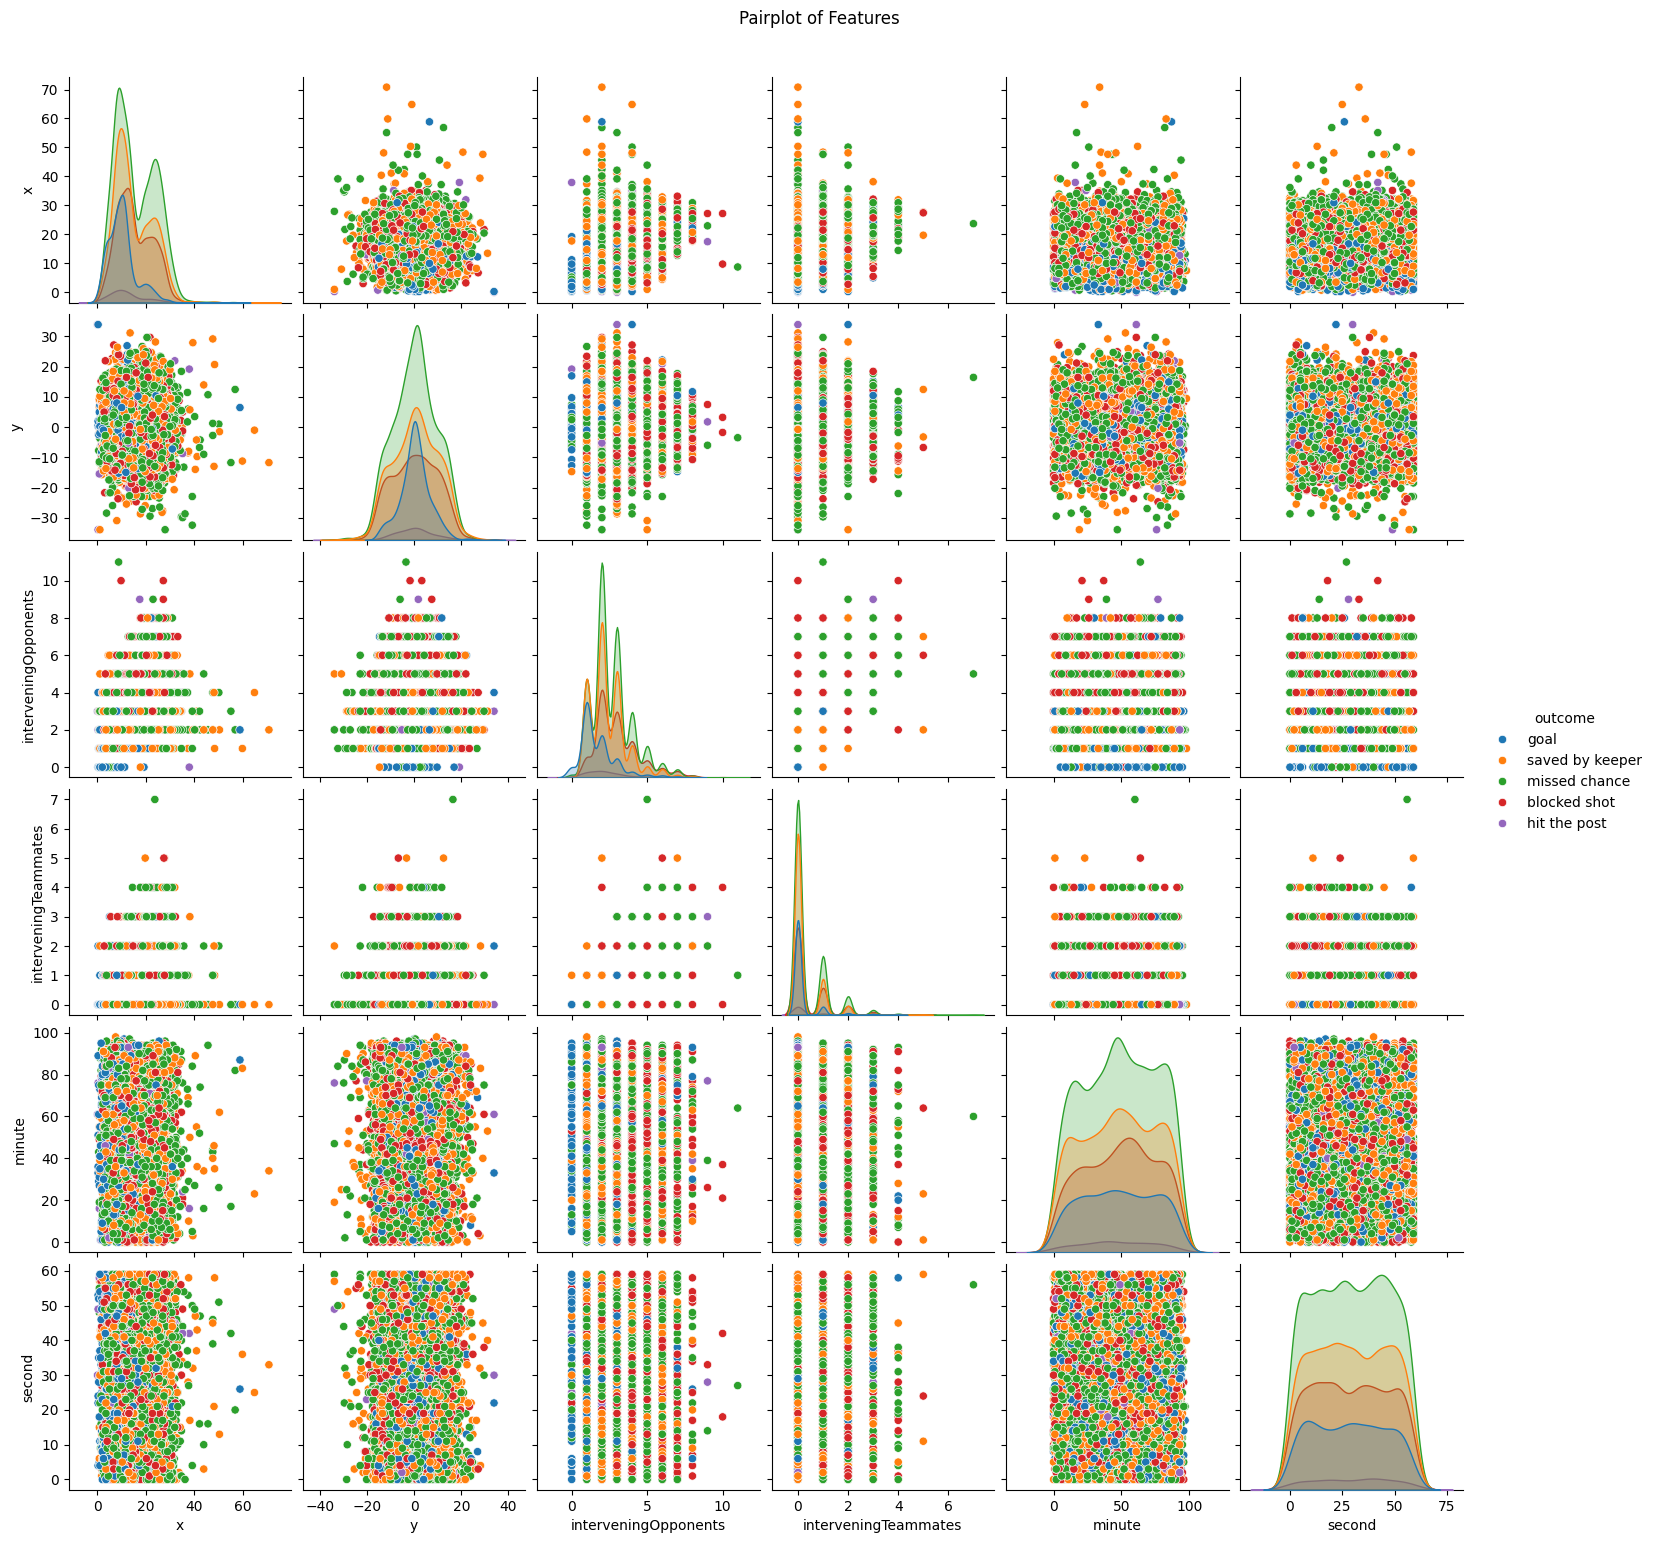

In [59]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue="outcome")
plt.suptitle("Pairplot of Features", y=1.03)
plt.show()

Although the player has an important impact on the goal success, in order to have a more general inference, the playr ID will be removed.

In [60]:
df = df.drop('matchId', axis = 1)
df = df.drop('playerId', axis = 1)
display(df.shape)
df.head(10)

(8925, 10)

,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,open play,right foot,10.72,5.24,2,0,medium,76,46,goal
5,open play,head,5.49,-1.50,1,0,low,40,15,missed chance
6,open play,head,14.46,-1.25,3,0,medium,88,8,missed chance
7,open play,head,8.98,4.99,1,0,low,10,29,missed chance
8,open play,left foot,23.44,-1.25,3,0,medium,58,45,blocked shot
9,open play,left foot,8.48,3.99,2,1,medium,43,55,blocked shot


In [61]:
df = df.dropna()
df = df.reset_index(drop=True)
display(df.shape)
df.head()

(8891, 10)

,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,open play,right foot,10.72,5.24,2,0,medium,76,46,goal


- Encoding Features to perform Linear Regression:

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['playType', 'bodyPart'])
    ],
    remainder='passthrough' 
)

df_transformed = column_transformer.fit_transform(df)
columns_names = column_transformer.get_feature_names_out()

for i in range(len(columns_names)):
    colname = columns_names[i]
    if "remainder__" in colname:
        columns_names[i] = colname.replace("remainder__", "")

feature_names = columns_names

interference_mapping = {'low': 1, 'medium': 2, 'high': 3}
outcome_mapping = {'goal': 5, 'saved by keeper': 4, 'missed chance': 2, 'blocked shot': 1, 'hit the post': 3}

df_transformed = pd.DataFrame(df_transformed, columns=feature_names)
df_transformed['outcome'] = df['outcome'].map(outcome_mapping)
df_transformed["interferenceOnShooter"] = df["interferenceOnShooter"].map(interference_mapping)

df_transformed.head()

,onehot__playType_free kick,onehot__playType_olimpico,onehot__playType_open play,onehot__playType_penalty,onehot__bodyPart_head,onehot__bodyPart_left foot,onehot__bodyPart_other,onehot__bodyPart_right foot,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.47,-11.22,1,0,2,70,9,5
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9.48,14.22,3,0,2,55,4,4
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.43,-1.25,6,2,1,86,31,4
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,26.93,1.0,4,1,2,77,2,2
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10.72,5.24,2,0,2,76,46,5


In [63]:
print(df_transformed.isnull().sum())

onehot__playType_free kick     0
onehot__playType_olimpico      0
onehot__playType_open play     0
onehot__playType_penalty       0
onehot__bodyPart_head          0
onehot__bodyPart_left foot     0
onehot__bodyPart_other         0
onehot__bodyPart_right foot    0
x                              0
y                              0
interveningOpponents           0
interveningTeammates           0
interferenceOnShooter          0
minute                         0
second                         0
outcome                        0
dtype: int64


In [64]:
df_backup = df
df = df_transformed

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

X = df.drop(columns=["outcome"]).values
y = df["outcome"].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



mi_scores = mutual_info_regression(X_train_scaled, y_train)
mi_df = pd.DataFrame({"Feature": df.drop(columns=["outcome"]).columns, "Importance": mi_scores})
mi_df_sorted = mi_df.sort_values(by="Importance", ascending=False)

# Display the results
print("\nMutual Information Importance:")
print(mi_df_sorted)


Mutual Information Importance:
                        Feature  Importance
10         interveningOpponents    0.062811
8                             x    0.044417
9                             y    0.036021
3      onehot__playType_penalty    0.018063
4         onehot__bodyPart_head    0.010001
11         interveningTeammates    0.007955
7   onehot__bodyPart_right foot    0.006214
6        onehot__bodyPart_other    0.005848
12        interferenceOnShooter    0.005707
0    onehot__playType_free kick    0.005499
1     onehot__playType_olimpico    0.000000
2    onehot__playType_open play    0.000000
5    onehot__bodyPart_left foot    0.000000
13                       minute    0.000000
14                       second    0.000000


In [67]:
df = df_backup

- Feature Engineering :

1. Goal Time:

Using two individual features representing time in minutes and seconds does not represent the data clearly in the model. Therefore, these two columns should be merged as a single column, which is named "time":

In [68]:
df["time"] = df["minute"]*60 + df["second"]
df.drop(columns=["minute", "second"], inplace=True)

2. Shot angle:

The angle which the player makes the shot clealry has an important role in the success rate of the goal. therefore, we include this feature to our dataset:

In [69]:
import numpy as np

def angle(x, y):
    c = 7.32
    firstPost = np.array([0, c/2])
    secondPost = np.array([0, -c/2])
    cooridnate = np.concatenate((x, y)).T

    a = np.linalg.norm(cooridnate - firstPost, axis=1)
    b = np.linalg.norm(cooridnate - secondPost, axis=1)

    return np.arccos((a**2 + b**2 - c**2)/(2*a*b)).reshape(-1, 1)

df['angle'] = angle(np.array(df['x']).reshape(1, -1), np.array(df['y']).reshape(1, -1))

3. Distance:

In [71]:
def distance(x, y):
    return ((x**2 + y**2)**(0.5)).reshape(-1, 1)
df['distance'] = distance(np.array(df['x']).reshape(1, -1), np.array(df['y']).reshape(1, -1))
df.head(10)

,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,outcome,time,angle,distance
0,open play,right foot,13.47,-11.22,1,0,medium,goal,4209,0.323655,17.530810
1,open play,left foot,9.48,14.22,3,0,medium,saved by keeper,3304,0.244042,17.090313
2,free kick,left foot,29.43,-1.25,6,2,low,saved by keeper,5191,0.247021,29.456534
3,open play,right foot,26.93,1.00,4,1,medium,missed chance,4622,0.269800,26.948560
4,open play,right foot,10.72,5.24,2,0,medium,goal,4606,0.546566,11.932141
5,open play,head,5.49,-1.50,1,0,low,missed chance,2415,1.129263,5.691230
6,open play,head,14.46,-1.25,3,0,medium,missed chance,5288,0.492490,14.513928
7,open play,head,8.98,4.99,1,0,low,missed chance,629,0.619644,10.273291
8,open play,left foot,23.44,-1.25,3,0,medium,blocked shot,3525,0.308941,23.473306
9,open play,left foot,8.48,3.99,2,1,medium,blocked shot,2635,0.695091,9.371793


Lets again perform the encoding for categorical features :

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Define the column transformer for one-hot encoding
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['playType', 'bodyPart'])
    ],
    remainder='passthrough'  # leave other columns unchanged
)

# Apply the transformers
df_transformed = column_transformer.fit_transform(df)
columns_names = column_transformer.get_feature_names_out()

for i in range(len(columns_names)):
    colname = columns_names[i]
    if "remainder__" in colname:
        columns_names[i] = colname.replace("remainder__", "")


feature_names = columns_names

interference_mapping = {'low': 1, 'medium': 2, 'high': 3}
outcome_mapping = {'goal': 5, 'saved by keeper': 4, 'missed chance': 2, 'blocked shot': 1, 'hit the post': 3}

df_transformed = pd.DataFrame(df_transformed, columns=feature_names)
df_transformed['outcome'] = df['outcome'].map(outcome_mapping)
df_transformed["interferenceOnShooter"] = df["interferenceOnShooter"].map(interference_mapping)

# Converting transformed array back to DataFrame with new column names

df_transformed.head()


,onehot__playType_free kick,onehot__playType_olimpico,onehot__playType_open play,onehot__playType_penalty,onehot__bodyPart_head,onehot__bodyPart_left foot,onehot__bodyPart_other,onehot__bodyPart_right foot,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,outcome,time,angle,distance
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.47,-11.22,1,0,2,5,4209,0.323655,17.53081
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9.48,14.22,3,0,2,4,3304,0.244042,17.090313
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.43,-1.25,6,2,1,4,5191,0.247021,29.456534
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,26.93,1.0,4,1,2,2,4622,0.2698,26.94856
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10.72,5.24,2,0,2,5,4606,0.546566,11.932141


In [73]:
df_backup = df
df = df_transformed

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

X = df.drop(columns=["outcome"]).values
y = df["outcome"].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



mi_scores = mutual_info_regression(X_train_scaled, y_train)
mi_df = pd.DataFrame({"Feature": df.drop(columns=["outcome"]).columns, "Importance": mi_scores})
mi_df_sorted = mi_df.sort_values(by="Importance", ascending=False)

# Display the results
print("\nMutual Information Importance:")
print(mi_df_sorted)


Mutual Information Importance:
                        Feature  Importance
14                        angle    0.074348
15                     distance    0.063672
10         interveningOpponents    0.061291
8                             x    0.058799
9                             y    0.041965
4         onehot__bodyPart_head    0.020103
11         interveningTeammates    0.014113
6        onehot__bodyPart_other    0.014019
2    onehot__playType_open play    0.012218
13                         time    0.006996
12        interferenceOnShooter    0.005982
0    onehot__playType_free kick    0.003881
7   onehot__bodyPart_right foot    0.003170
3      onehot__playType_penalty    0.001774
1     onehot__playType_olimpico    0.000000
5    onehot__bodyPart_left foot    0.000000


It is evident that these features, after preprocessing and engineering, are a better representatives of the outcome label, hence can build up a better regression model.

## Task 2: Multivariate Regression Implementation

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

In [160]:
df = pd.read_csv("cars.csv")
df.head()

,Sales in Thousands,Year Resale Value,Price in Thousands,Engine Size,Horsepower,Wheelbase,Width,Length,Curb Weight,Fuel Capacity,Fuel Efficiency,Power Perf Factor,Vehicle Type Car,Vehicle Type Passenger
0,16.919,16.360,21.500,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150,0,1
1,39.384,19.875,28.400,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778,0,1
2,20.397,22.255,23.990,1.8,150,102.6,68.2,178.0,2.998,16.4,27,62.777639,0,1
3,18.780,23.555,33.950,2.8,200,108.7,76.1,192.0,3.561,18.5,22,84.565105,0,1
4,91.561,12.475,21.975,3.1,175,109.0,72.7,194.6,3.368,17.5,25,71.181451,0,1


- Test/Train seperation :

In [161]:
X = df.drop(columns=["Price in Thousands"]).values
y = df["Price in Thousands"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* gardient descent functions:

In [162]:
def gardient_descent(X, y_train, w_init, learning_rate, number_of_iterations):
    weights = w_init
    err = []
    for _ in range(number_of_iterations):
        predictions = np.dot(X, weights)
        
        errors = y_train - predictions
        err.append(np.mean(errors))
        
        gradient = -2 * np.dot(X.T, errors) / len(y_train)
        weights -= learning_rate * gradient
    
    return weights, err

### "Price in Thousands" Prediction:

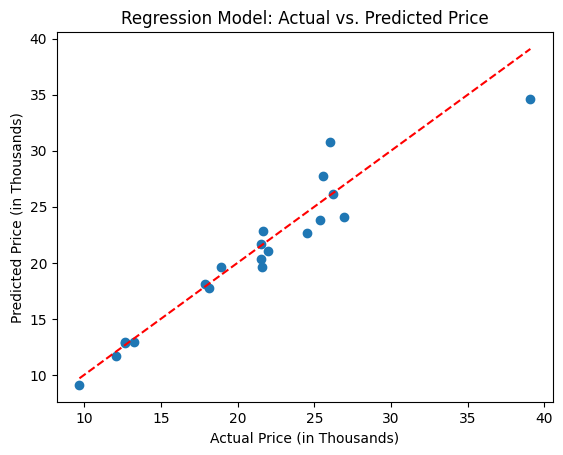

Accuracy for Price_in_Thousands: 94.49%


In [163]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

weight_initial = np.zeros(X_train_scaled.shape[1] + 1)
learning_rate = 0.01
total_iterations = 1000

X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

weights, err = gardient_descent(X_train_bias, y_train, weight_initial, learning_rate, total_iterations)
y_pred = np.dot(X_test_bias, weights)

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Price (in Thousands)")
plt.ylabel("Predicted Price (in Thousands)")
plt.title("Regression Model: Actual vs. Predicted Price")
plt.show()

accuracy = np.mean(np.abs(y_test - y_pred) / y_test)
print(f"Accuracy for Price_in_Thousands: {100 * (1 - accuracy):.2f}%")

In [164]:
mi_scores = mutual_info_regression(X_train_scaled, y_train)
mi_df = pd.DataFrame({"Feature": df.drop(columns=["Price in Thousands"]).columns, "Importance": mi_scores})
mi_df_sorted = mi_df.sort_values(by="Importance", ascending=False)

print("\nMutual Information Importance:")
print(mi_df_sorted)


Mutual Information Importance:
                   Feature  Importance
10       Power Perf Factor    0.792671
1        Year Resale Value    0.695673
3               Horsepower    0.650606
7              Curb Weight    0.593912
8            Fuel Capacity    0.555930
5                    Width    0.456670
9          Fuel Efficiency    0.429418
2              Engine Size    0.427661
6                   Length    0.322361
4                Wheelbase    0.174839
11        Vehicle Type Car    0.036962
12  Vehicle Type Passenger    0.036962
0       Sales in Thousands    0.000000


Text(0.5, 1.0, 'learning curve')

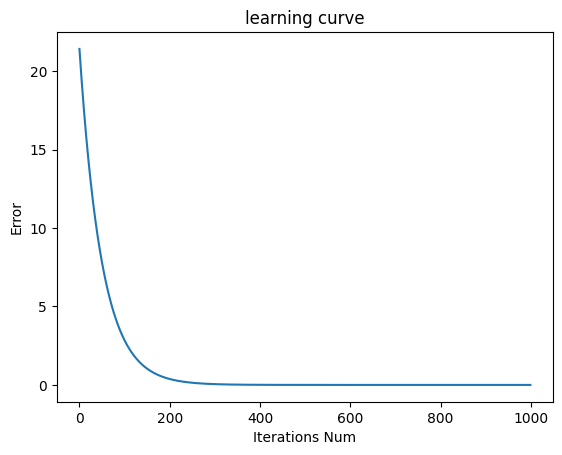

In [165]:
plt.plot(err)
plt.ylabel("Error")
plt.xlabel("Iterations Num")
plt.title('learning curve')

80
80


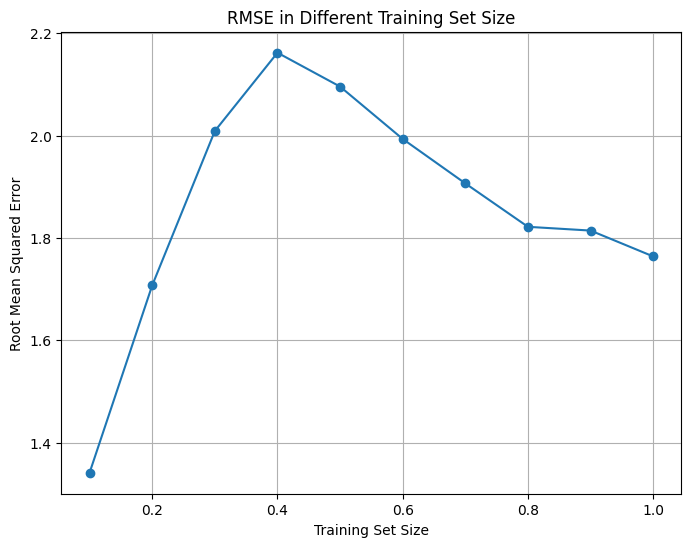

In [166]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = len(X_train_scaled)
num_features = len(weights) 

X = X_train_scaled
bias = np.ones((num_samples, 1))
X_bias = np.hstack((bias, X))
y_true = y_train
print(len(X_train_scaled))
print(len(X_bias))

train_size_range = np.linspace(0.1, 1.0, 10)
train_errors = []

for train_size in train_size_range:
    subset_size = int(train_size * num_samples)
    X_subset = X_bias[:subset_size]
    y_subset = y_true[:subset_size]

    y_pred = np.dot(X_subset, weights)

    rmse = np.sqrt(np.mean((y_subset - y_pred) ** 2))
    train_errors.append(rmse)

plt.figure(figsize=(8, 6))
plt.plot(train_size_range, train_errors, marker="o")
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error")
plt.title("RMSE in Different Training Set Size")
plt.grid()
plt.show()

### "Horse Power" Prediction:

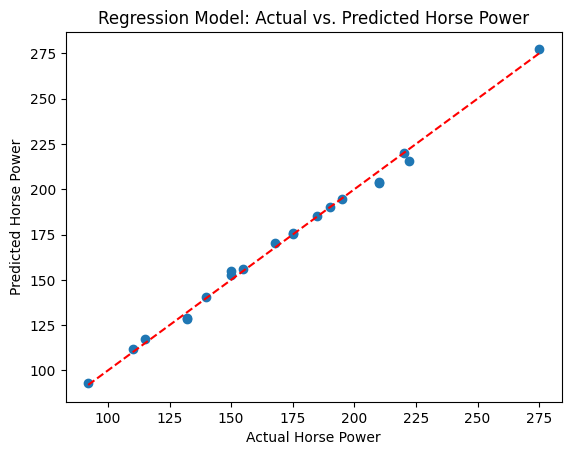

Accuracy for Price_in_Thousands: 98.60%


In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

df = pd.read_csv("cars.csv")

X = df.drop(columns=["Horsepower"]).values
y = df["Horsepower"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

weights = np.zeros(X_train_scaled.shape[1] + 1)
learning_rate = 0.01
num_iterations = 1000

X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]

weights, err = gardient_descent(X_train_bias, y_train, weight_initial, learning_rate, total_iterations)
X_test_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
y_pred = np.dot(X_test_bias, weights)

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Horse Power")
plt.ylabel("Predicted Horse Power")
plt.title("Regression Model: Actual vs. Predicted Horse Power")
plt.show()


accuracy = np.mean(np.abs(y_test - y_pred) / y_test)
print(f"Accuracy for Price_in_Thousands: {100 * (1 - accuracy):.2f}%")

In [168]:
mi_scores = mutual_info_regression(X_train_scaled, y_train)
mi_df = pd.DataFrame({"Feature": df.drop(columns=["Horsepower"]).columns, "Importance": mi_scores})
mi_df_sorted = mi_df.sort_values(by="Importance", ascending=False)
print("\nMutual Information Importance:")
print(mi_df_sorted)


Mutual Information Importance:
                   Feature  Importance
10       Power Perf Factor    2.195945
3              Engine Size    0.689278
2       Price in Thousands    0.641005
7              Curb Weight    0.537959
9          Fuel Efficiency    0.536299
8            Fuel Capacity    0.413598
6                   Length    0.401788
5                    Width    0.397873
4                Wheelbase    0.366963
1        Year Resale Value    0.244605
11        Vehicle Type Car    0.060160
12  Vehicle Type Passenger    0.054183
0       Sales in Thousands    0.000000


Text(0.5, 1.0, 'learning curve')

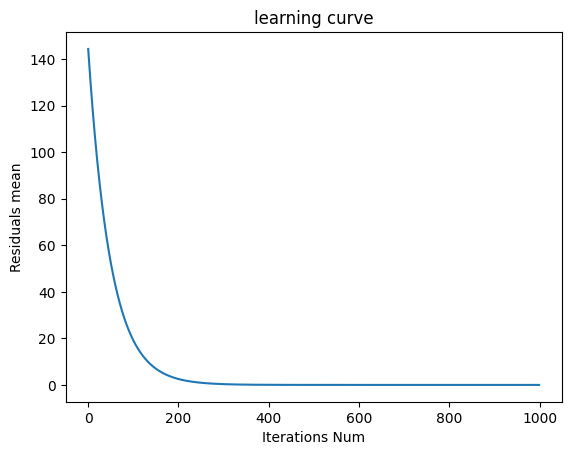

In [179]:
plt.plot(err)
plt.ylabel("Residuals mean")
plt.xlabel("Iterations Num")
plt.title('learning curve')

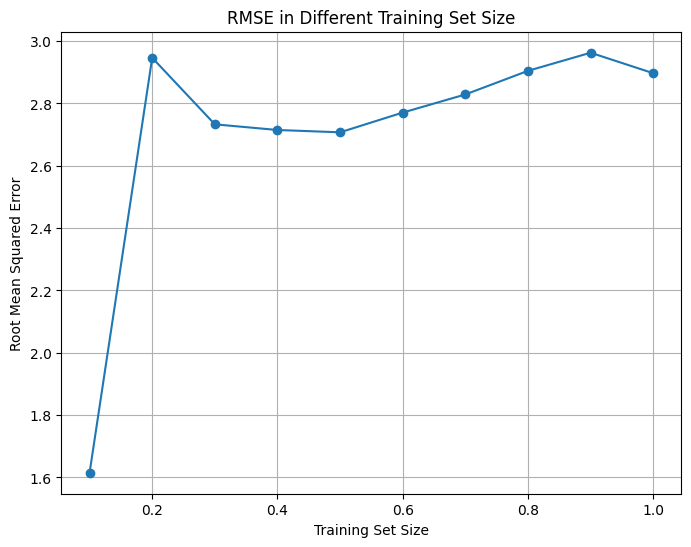

In [170]:
num_samples = len(X_train_scaled)
num_features = len(weights)  

X = X_train_scaled
bias = np.ones((num_samples, 1))
X_bias = np.hstack((bias, X))
y_true = y_train

train_size_range = np.linspace(0.1, 1.0, 10)
train_errors = []

for train_size in train_size_range:
    subset_size = int(train_size * num_samples)
    X_subset = X_bias[:subset_size]
    y_subset = y_true[:subset_size]

    y_pred = np.dot(X_subset, weights)

    rmse = np.sqrt(np.mean((y_subset - y_pred) ** 2))
    train_errors.append(rmse)

plt.figure(figsize=(8, 6))
plt.plot(train_size_range, train_errors, marker="o")
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error")
plt.title("RMSE in Different Training Set Size")
plt.grid()
plt.show()

In [158]:
X_train_scaled.shape

(80, 13)

## Task 3: Manual K-Fold Cross Validation Implementation

Fold 1 Accuracy: 97.96%
Fold 2 Accuracy: 97.46%
Fold 3 Accuracy: 98.06%
Fold 4 Accuracy: 97.58%
Fold 5 Accuracy: 98.01%


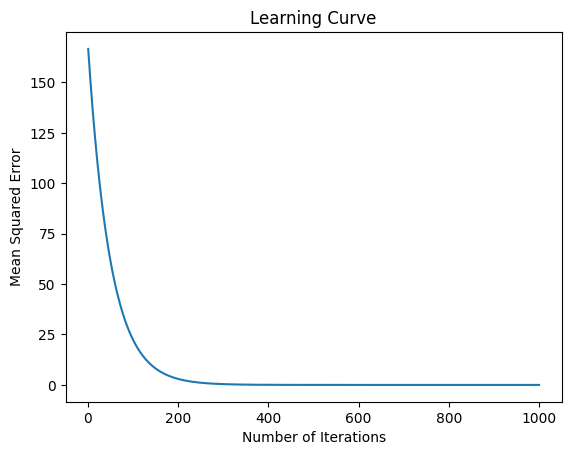

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def gradient_descent(X, y_train, w_init, learning_rate, num_iterations):
    weights = w_init
    errors = []
    for _ in range(num_iterations):
        predictions = np.dot(X, weights)
        error = y_train - predictions
        errors.append(np.mean(error))
        gradient = -2 * np.dot(X.T, error) / len(y_train)
        weights -= learning_rate * gradient
    return weights, errors

def k_fold_cross_validation(X, y, k, learning_rate, num_iterations):
    n_samples = len(y)
    fold_size = n_samples // k
    errors = []
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i < k - 1 else n_samples
        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)
        X_val = X[start:end]
        y_val = y[start:end]
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
        X_val_bias = np.c_[np.ones(X_val_scaled.shape[0]), X_val_scaled]
        
        weights = np.zeros(X_train_bias.shape[1])
        weights, errors_fold = gradient_descent(X_train_bias, y_train, weights, learning_rate, num_iterations)
        errors.append(errors_fold)
        
        y_pred = np.dot(X_val_bias, weights)
        accuracy = np.mean(np.abs(y_val - y_pred) / y_val)
        print(f"Fold {i+1} Accuracy: {100 * (1 - accuracy):.2f}%")
    return np.array(errors)

df = pd.read_csv("cars.csv")
X = df.drop(columns=["Horsepower"]).values
y = df["Horsepower"].values

learning_rate = 0.01
num_iterations = 1000
k = 5

errors = k_fold_cross_validation(X, y, k, learning_rate, num_iterations)

mean_errors = np.mean(errors, axis=0)
std_errors = np.std(errors, axis=0)

plt.plot(range(1, num_iterations + 1), mean_errors.reshape(-1))
plt.xlabel("Number of Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.show()

## Task 4: Comparison with Built-in Python Libraries

### Multivariate Regression:

#### "Price in Thousands" Prediction:

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("cars.csv")

X = df.drop(columns=["Price in Thousands"]).values
y = df["Price in Thousands"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
accuracy = np.mean(np.abs(y_test - y_pred) / y_test)
print("Mean Squared Error (MSE):", mse)
print(f"Accuracy for Price_in_Thousands: {100 * (1 - accuracy):.2f}%")

Mean Squared Error (MSE): 1.7279369086736156e-16
Accuracy for Price_in_Thousands: 100.00%


#### "Horse Power" Prediction:

In [195]:
df = pd.read_csv("cars.csv")

X = df.drop(columns=["Horsepower"]).values
y = df["Horsepower"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
accuracy = np.mean(np.abs(y_test - y_pred) / y_test)
print("Mean Squared Error (MSE):", mse)
print(f"Accuracy for Price_in_Thousands: {100 * (1 - accuracy):.2f}%")

Mean Squared Error (MSE): 2.0553082287566923e-16
Accuracy for Price_in_Thousands: 100.00%


### K-Fold Cross Validation:

#### "Price in Thousands" Prediction:

In [197]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

df = pd.read_csv('cars.csv')

X = df.drop('Price in Thousands', axis=1)
y = df['Price in Thousands']

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

model = LinearRegression()

for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = np.mean(np.abs(y_test - y_pred) / y_test)
    print(f"Fold {i+1} Accuracy: {100 * (1 - accuracy):.2f}%")
    mse = ((y_pred - y_test) ** 2).mean()
    print("Mean Squared Error:", mse)

Fold 1 Accuracy: 100.00%
Mean Squared Error: 1.7279277631107799e-16
Fold 2 Accuracy: 100.00%
Mean Squared Error: 2.5629442852704657e-16
Fold 3 Accuracy: 100.00%
Mean Squared Error: 2.0255790532778444e-16
Fold 4 Accuracy: 100.00%
Mean Squared Error: 1.0608853642837914e-16
Fold 5 Accuracy: 100.00%
Mean Squared Error: 4.3803632713759487e-16


#### "Horse Power" Prediction:

In [196]:
df = pd.read_csv('cars.csv')

X = df.drop('Horsepower', axis=1)
y = df['Horsepower']

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

model = LinearRegression()

for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = np.mean(np.abs(y_test - y_pred) / y_test)
    print(f"Fold {i+1} Accuracy: {100 * (1 - accuracy):.2f}%")
    mse = ((y_pred - y_test) ** 2).mean()
    print("Mean Squared Error:", mse)

Fold 1 Accuracy: 100.00%
Mean Squared Error: 2.055312057606616e-16
Fold 2 Accuracy: 100.00%
Mean Squared Error: 3.048639896912429e-16
Fold 3 Accuracy: 100.00%
Mean Squared Error: 2.4094052148905437e-16
Fold 4 Accuracy: 100.00%
Mean Squared Error: 1.2619253555881405e-16
Fold 5 Accuracy: 100.00%
Mean Squared Error: 5.210451728844328e-16


Average Training RMSE: 148.87
Average Validation RMSE: 148.51


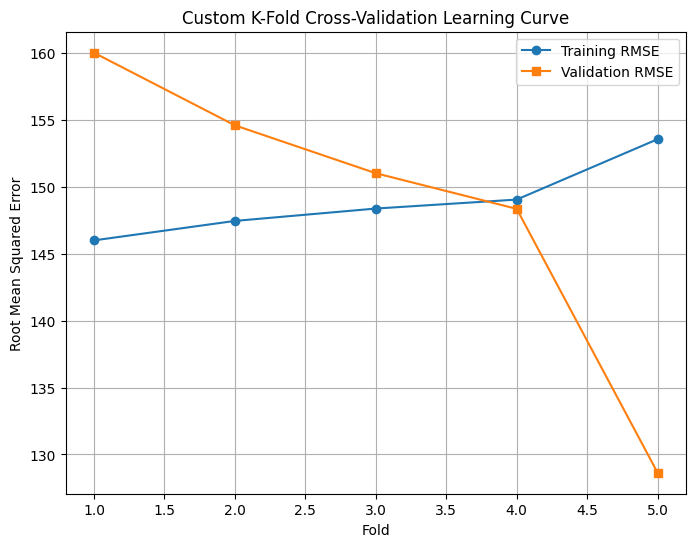

In [154]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("cars.csv")

# Select relevant features (excluding "Price_in_Thousands") and target variable
X = df.drop(columns=["Price in Thousands"]).values
y = df["Price in Thousands"].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize weights (you mentioned you have weights)
# Add bias term (intercept)
X_bias = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Custom K-Fold Cross-Validation
k = 5  # Number of folds
subset_size = len(X_bias) // k

train_errors = []
test_errors = []

for fold in range(k):
    # Split data into train and test sets
    test_start = fold * subset_size
    test_end = (fold + 1) * subset_size
    X_train = np.vstack((X_bias[:test_start], X_bias[test_end:]))
    y_train = np.concatenate((y[:test_start], y[test_end:]))
    X_test = X_bias[test_start:test_end]
    y_test = y[test_start:test_end]

    # Gradient Descent
    # Update weights using gradient descent on the training data

    # Predict on train and test sets
    y_train_pred = np.dot(X_train, weights)
    y_test_pred = np.dot(X_test, weights)

    # Calculate RMSE for train and test sets
    train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
    test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

# Calculate average RMSE across all folds
avg_train_rmse = np.mean(train_errors)
avg_test_rmse = np.mean(test_errors)

print(f"Average Training RMSE: {avg_train_rmse:.2f}")
print(f"Average Validation RMSE: {avg_test_rmse:.2f}")

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, k + 1), train_errors, label="Training RMSE", marker="o")
plt.plot(range(1, k + 1), test_errors, label="Validation RMSE", marker="s")
plt.xlabel("Fold")
plt.ylabel("Root Mean Squared Error")
plt.title("Custom K-Fold Cross-Validation Learning Curve")
plt.legend()
plt.grid()
plt.show()


In [155]:
subset_size

20

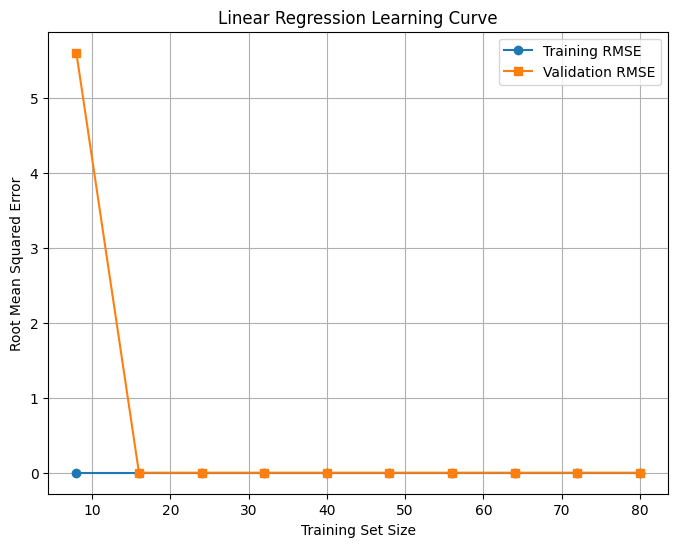

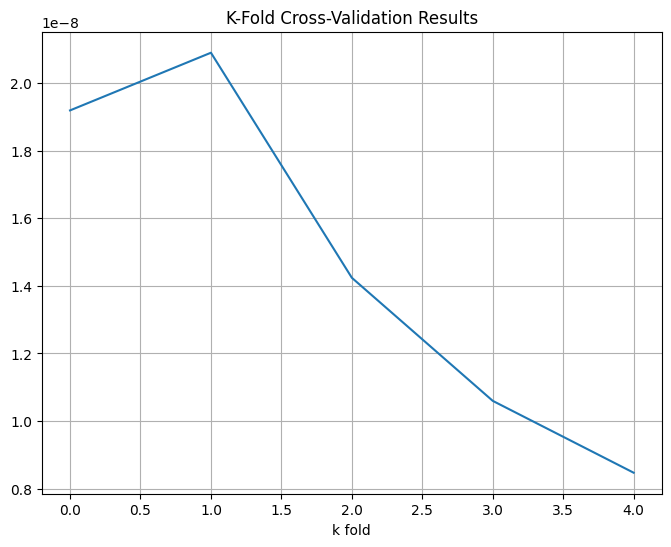

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace "your_dataset.csv" with the actual file name)
df = pd.read_csv("cars.csv")

# Select relevant features (excluding the target variable) and target variable
X = df.drop(columns=["Price in Thousands"]).values
y = df["Price in Thousands"].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the linear regression model
model = LinearRegression()

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10))

# Convert negative mean squared error to root mean squared error
train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_rmse, label="Training RMSE", marker="o")
plt.plot(train_sizes, test_rmse, label="Validation RMSE", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error")
plt.title("Linear Regression Learning Curve")
plt.legend()
plt.grid()
plt.show()

# Perform K-Fold cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring="neg_mean_squared_error")
cv_rmse = np.sqrt(-cv_scores)

# Plot the cross-validation results
plt.figure(figsize=(8, 6))
plt.plot(cv_rmse)
plt.xlabel("k fold")
plt.title("K-Fold Cross-Validation Results")
plt.grid()
plt.show()


In [29]:
train_rmse

array([2.30036496e-14, 4.63870261e-09, 1.22511847e-08, 1.20286120e-08,
       1.24731822e-08, 1.22514355e-08, 1.28364303e-08, 1.24713319e-08,
       1.21751193e-08, 1.18648698e-08])

In [32]:
cv_rmse

array([1.91902582e-08, 2.08967765e-08, 1.42381118e-08, 1.05965085e-08,
       8.47016652e-09])

In [34]:
X_scaled

array([[-0.6358796 ,  0.49510936, -1.20558656, ..., -0.54995253,
        -0.62360956,  0.62360956],
       [-0.34829748,  1.26803057,  0.37477035, ...,  1.34429809,
        -0.62360956,  0.62360956],
       [-0.59135654,  1.7913741 , -1.20558656, ..., -0.29249678,
        -0.62360956,  0.62360956],
       ...,
       [-0.19829136,  0.57537003, -1.20558656, ..., -0.35410643,
        -0.62360956,  0.62360956],
       [-0.72996946,  0.54238619, -0.97982128, ..., -1.08649082,
        -0.62360956,  0.62360956],
       [-0.78082918, -0.07661046, -0.97982128, ..., -1.14147578,
        -0.62360956,  0.62360956]])

### QUESTIONS :

1. Describe your strategy for addressing challenges such as handling missing
 values and categorical features. Could you also elaborate on your feature
 selection metrics and explain the rationale behind them?

2. Why didn’t we use regression to predict whether a shot would result in a goal?

Clearly, using linear regression for estimating classification problems leads to an inaccurate model, since the classes form a discrete set of numbers which do not have a numerical meaning, but refreing to a specific type or a class. Therefore, fitting a line between features and the dependent variable will cause to reach to a misleading line that cannot describe the data accurately.

For classification problems, the solution is using <span style="color : red;">"Logistic Regression"</span>.

3. How would you go about verifying the accuracy of the given formula used to
 calculate the shot angle in the preprocessing section?

- <u>Theoretical approach</u> : The formula can be proved to have an approximate relation to theta

<div style="text-align: center;">
<img src="theta_formula.jpg" width="50%" height="50%" alt="Description or Alt text">
</div>

As it is evident, the formula given is actually equal to $\tan(\theta)$ which is approxiamtely equal to $\theta$ when it approcahes to zero.

- <u>Comparison with an accurate formula</u> : the value of $\theta$ can also be derived from the Law of Cosines :
$$c^2 = a^2 + b^2 - 2ab \cdot \cos(\theta)$$


Hence $$\theta = \arccos\left(\frac{{a^2 + b^2 - c^2}}{{2ab}}\right)$$
